In [7]:
# Print Python and Conda versions
!python --version

Python 3.10.9


In [8]:
# Local path to data
DATA_DIR = '/projects/bachelor-thesis/data'
!ls $DATA_DIR

masks  raw_data_32TNS_1C  raw_data_32TNS_2A


In [9]:
# Define and clear temp working directory
TMP_DIR = '/projects/bachelor-thesis/tmp'
!rm -rf $TMP_DIR
!mkdir -p $TMP_DIR

In [10]:
# Here you can choose the date of the Sentinel-2 image you want to process
DATE = "20210710T101559"

In [4]:
# List corresponding files
!ls "$DATA_DIR/raw_data_32TNS_1C" | grep $DATE
!ls "$DATA_DIR/raw_data_32TNS_2A" | grep $DATE

!unzip "$DATA_DIR/raw_data_32TNS_1C/"$(ls "$DATA_DIR/raw_data_32TNS_1C" | grep $DATE) -d $TMP_DIR
!unzip "$DATA_DIR/raw_data_32TNS_2A/"$(ls "$DATA_DIR/raw_data_32TNS_2A" | grep $DATE) -d $TMP_DIR

S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.zip
S2B_MSIL2A_20210710T101559_N0301_R065_T32TNS_20210710T132321.zip
Archive:  /projects/bachelor-thesis/data/raw_data_32TNS_1C/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.zip
 extracting: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/MTD_MSIL1C.xml  
 extracting: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/INSPIRE.xml  
 extracting: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/manifest.safe  
   creating: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/AUX_DATA/
 extracting: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/GRANULE/L1C_T32TNS_A022685_20210710T102312/MTD_TL.xml  
 extracting: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_

In [13]:
# Search for a folder starting with "S2B_MSIL1C_$DATE"
FOLDER = !ls $TMP_DIR | grep "S2B_MSIL1C_$DATE"
FOLDER = FOLDER[0]

BASE_PATH = f"{TMP_DIR}/{FOLDER}/GRANULE/"

# list all subfolders of the base path
SUBFOLDER = !ls $BASE_PATH
BASE_PATH += '/' + SUBFOLDER[0] + '/IMG_DATA'
BASE_PATH

'/projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/GRANULE//L1C_T32TNS_A022685_20210710T102312/IMG_DATA'

In [14]:
B01 = f"T32TNS_{DATE}_B01.jp2"
B02 = f"T32TNS_{DATE}_B02.jp2"
B03 = f"T32TNS_{DATE}_B03.jp2"
B04 = f"T32TNS_{DATE}_B04.jp2"
B05 = f"T32TNS_{DATE}_B05.jp2"
B06 = f"T32TNS_{DATE}_B06.jp2"
B07 = f"T32TNS_{DATE}_B07.jp2"
B08 = f"T32TNS_{DATE}_B08.jp2"
B8A = f"T32TNS_{DATE}_B8A.jp2"
B09 = f"T32TNS_{DATE}_B09.jp2"
B10 = f"T32TNS_{DATE}_B10.jp2"
B11 = f"T32TNS_{DATE}_B11.jp2"
B12 = f"T32TNS_{DATE}_B12.jp2"
TCI = f"T32TNS_{DATE}_TCI.jp2"

bands_files = [B01, B02, B03, B04, B05, B06, B07, B08, B8A, B09, B10, B11, B12, TCI]
bands_files = [f"{BASE_PATH}/{band}" for band in bands_files]

description = ["Coastal aerosol", "Blue", "Green", "Red", "Vegetation Red Edge 1", "Vegetation Red Edge 2",
               "Vegetation Red Edge 3", "NIR", "Vegetation Red Edge 4", "Water vapour", "SWIR - Cirrus",
               "SWIR 1", "SWIR 2", "True Color Image"]

In [15]:
# Search for a folder starting with "S2B_MSIL1C_$DATE"
FOLDER = !ls $TMP_DIR | grep "S2B_MSIL2A_$DATE"
FOLDER = FOLDER[0]

BASE_PATH = f"{TMP_DIR}/{FOLDER}/GRANULE/"

# list all subfolders of the base path
SUBFOLDER = !ls $BASE_PATH
BASE_PATH += '/' + SUBFOLDER[0] + '/QI_DATA'
BASE_PATH

'/projects/bachelor-thesis/tmp/S2B_MSIL2A_20210710T101559_N0301_R065_T32TNS_20210710T132321.SAFE/GRANULE//L2A_T32TNS_A022685_20210710T102312/QI_DATA'

In [16]:
MSK_CLDPRB_20m = "MSK_CLDPRB_20m.jp2"
MSK_CLDPRB_60m = "MSK_CLDPRB_60m.jp2"
MSK_SNWPRB_20m = "MSK_SNWPRB_20m.jp2"
MSK_SNWPRB_60m = "MSK_SNWPRB_60m.jp2"

In [19]:
import rasterio

# Open all the bands
bands = [rasterio.open(band) for band in bands_files]

# add description to bands
for i, band in enumerate(bands):
    band.description = description[i]
    bands[i] = band

band_B01 = bands[0]
band_B02 = bands[1]
band_B03 = bands[2]
band_B04 = bands[3]
band_B05 = bands[4]
band_B06 = bands[5]
band_B07 = bands[6]
band_B08 = bands[7]
band_B8A = bands[8]
band_B09 = bands[9]
band_B10 = bands[10]
band_B11 = bands[11]
band_B12 = bands[12]
band_TCI = bands[13]

mask_cldprb_20m = rasterio.open(f"{BASE_PATH}/{MSK_CLDPRB_20m}")
mask_cldprb_60m = rasterio.open(f"{BASE_PATH}/{MSK_CLDPRB_60m}")
mask_snwprb_20m = rasterio.open(f"{BASE_PATH}/{MSK_SNWPRB_20m}")
mask_snwprb_60m = rasterio.open(f"{BASE_PATH}/{MSK_SNWPRB_60m}")

In [20]:
# Plot all the bands 13 bands in a 4x4 grid
def show_all_bands(_bands_windowed, _bands):
    assert len(_bands_windowed) == len(_bands)
    assert all([isinstance(band, rasterio.io.DatasetReader) for band in _bands])

    # get indices of None entries in _bands_windowed
    _none_indices = [i for i, x in enumerate(_bands_windowed) if x is None]

    # remove None entries from _bands_windowed and _bands
    _bands_windowed = [x for i, x in enumerate(_bands_windowed) if i not in _none_indices]
    _bands = [x for i, x in enumerate(_bands) if i not in _none_indices]

    _fig, _ax = plt.subplots(4, 4, figsize=(20, 20))

    _fig.suptitle(f"Location ({lon}, {lat}) \n and Source {FOLDER}", fontsize=14)

    for _i in range(4):
            for _j in range(4):
                if _i * 4 + _j < len(_bands):
                    _img = _bands_windowed[_i * 4 + _j]
                    _meta = _bands[_i * 4 + _j]
                    show(_img, ax=_ax[_i, _j], title=f"{_meta.description} - {_meta.res[0]}m")

In [21]:
from matplotlib import pyplot as plt
from rasterio.plot import show


def show_cloud_mask(cloud_probs, downloaded_cloud_probs, windowed_TCI_band):
    # Print the difference between the two cloud masks
    print(f"Mean difference: {np.mean(np.abs(cloud_probs - downloaded_cloud_probs))}")

    fig, ax = plt.subplots(3, 2, figsize=(16, 24))

    fig.suptitle(f"Location ({lon}, {lat}) \n and Source {FOLDER}", fontsize=14)

    show(cloud_probs, ax=ax[0, 0], title="computed cloud prob (s2cloudless)", vmin=0, vmax=1)
    show(downloaded_cloud_probs, ax=ax[0, 1], title="downloaded cloud prob", vmin=0, vmax=1)
    show(cloud_probs - downloaded_cloud_probs, ax=ax[1, 0], cmap="RdBu", title="difference", vmin=-1, vmax=1)

    show(windowed_TCI_band, ax=ax[1, 1], title="true-color image")
    show(windowed_TCI_band, ax=ax[2, 0])
    show(windowed_TCI_band, ax=ax[2, 1])

    fig.colorbar(ax[0, 0].get_images()[0], ax=ax[0, 0])
    fig.colorbar(ax[0, 1].get_images()[0], ax=ax[0, 1])
    fig.colorbar(ax[1, 0].get_images()[0], ax=ax[1, 0])


    show(cloud_probs, ax=ax[2, 0], cmap="gnuplot", alpha=0.6 * cloud_probs[0],
             title="computed cloud prob (s2cloudless)")
    show(downloaded_cloud_probs, ax=ax[2, 1], cmap="gnuplot", alpha=0.6 * downloaded_cloud_probs[0],
         title="downloaded cloud mask")


In [22]:
from s2cloudless import S2PixelCloudDetector

# As we are looking at the cloud probability map, we can set the threshold to 0.0
cloud_detector = S2PixelCloudDetector(threshold=0, average_over=4, dilation_size=0, all_bands=True)

# Center of the image
(lon, lat) = (537917,5190701)

BASE_RES = 60.0
IMG_SIZE = 256

In [23]:
from rasterio.windows import Window
import numpy as np
import cv2

# sort bands by resolution
bands_windowed = [None] * len(bands)

for i, band in enumerate(bands):
    adjusted_img_size = int(IMG_SIZE * BASE_RES / band.res[0])
    py, px = band.index(lon, lat)
    window = Window(px - adjusted_img_size // 2, py - adjusted_img_size // 2, adjusted_img_size, adjusted_img_size)

    cropped_img = band.read(window=window)
    bands_windowed[i] = cropped_img

# index of first band with 60m resolution
first_60m_band = next(i for i, band in enumerate(bands) if band.res[0] == 60.0)
shape_60m_band = bands_windowed[first_60m_band].shape[1:]

bands_windowed_resized = [None] * len(bands)

for i, img in enumerate(bands_windowed):
    bands_windowed_resized[i] = np.transpose(
        cv2.resize(np.transpose(img), dsize=shape_60m_band, interpolation=cv2.INTER_LINEAR))

# Drop the TCI band
index = next(i for i, band in enumerate(bands) if band.description == "True Color Image")
s2cloudless_data = bands_windowed_resized.copy()
windowed_TCI_band = s2cloudless_data.pop(index)
s2cloudless_data = np.array(s2cloudless_data) / 10000.0

s2cloudless_data = np.transpose(s2cloudless_data, (1, 2, 0))

# add a dimension for the batch size
s2cloudless_data = np.expand_dims(s2cloudless_data, axis=0)

# Open downloaded cloud prop
adjusted_img_size = int(IMG_SIZE * BASE_RES / mask_cldprb_60m.res[0])
py, px = mask_cldprb_60m.index(lon, lat)
window = Window(px - adjusted_img_size // 2, py - adjusted_img_size // 2, adjusted_img_size, adjusted_img_size)
downloaded_cloud_probs = mask_cldprb_60m.read(window=window)

downloaded_cloud_probs = downloaded_cloud_probs / 100.0

# Compute cloud probabilities
cloud_probs = cloud_detector.get_cloud_probability_maps(s2cloudless_data)

In [24]:
s2cloudless_data.shape

(1, 256, 256, 13)

Mean difference: 0.3175344349538912


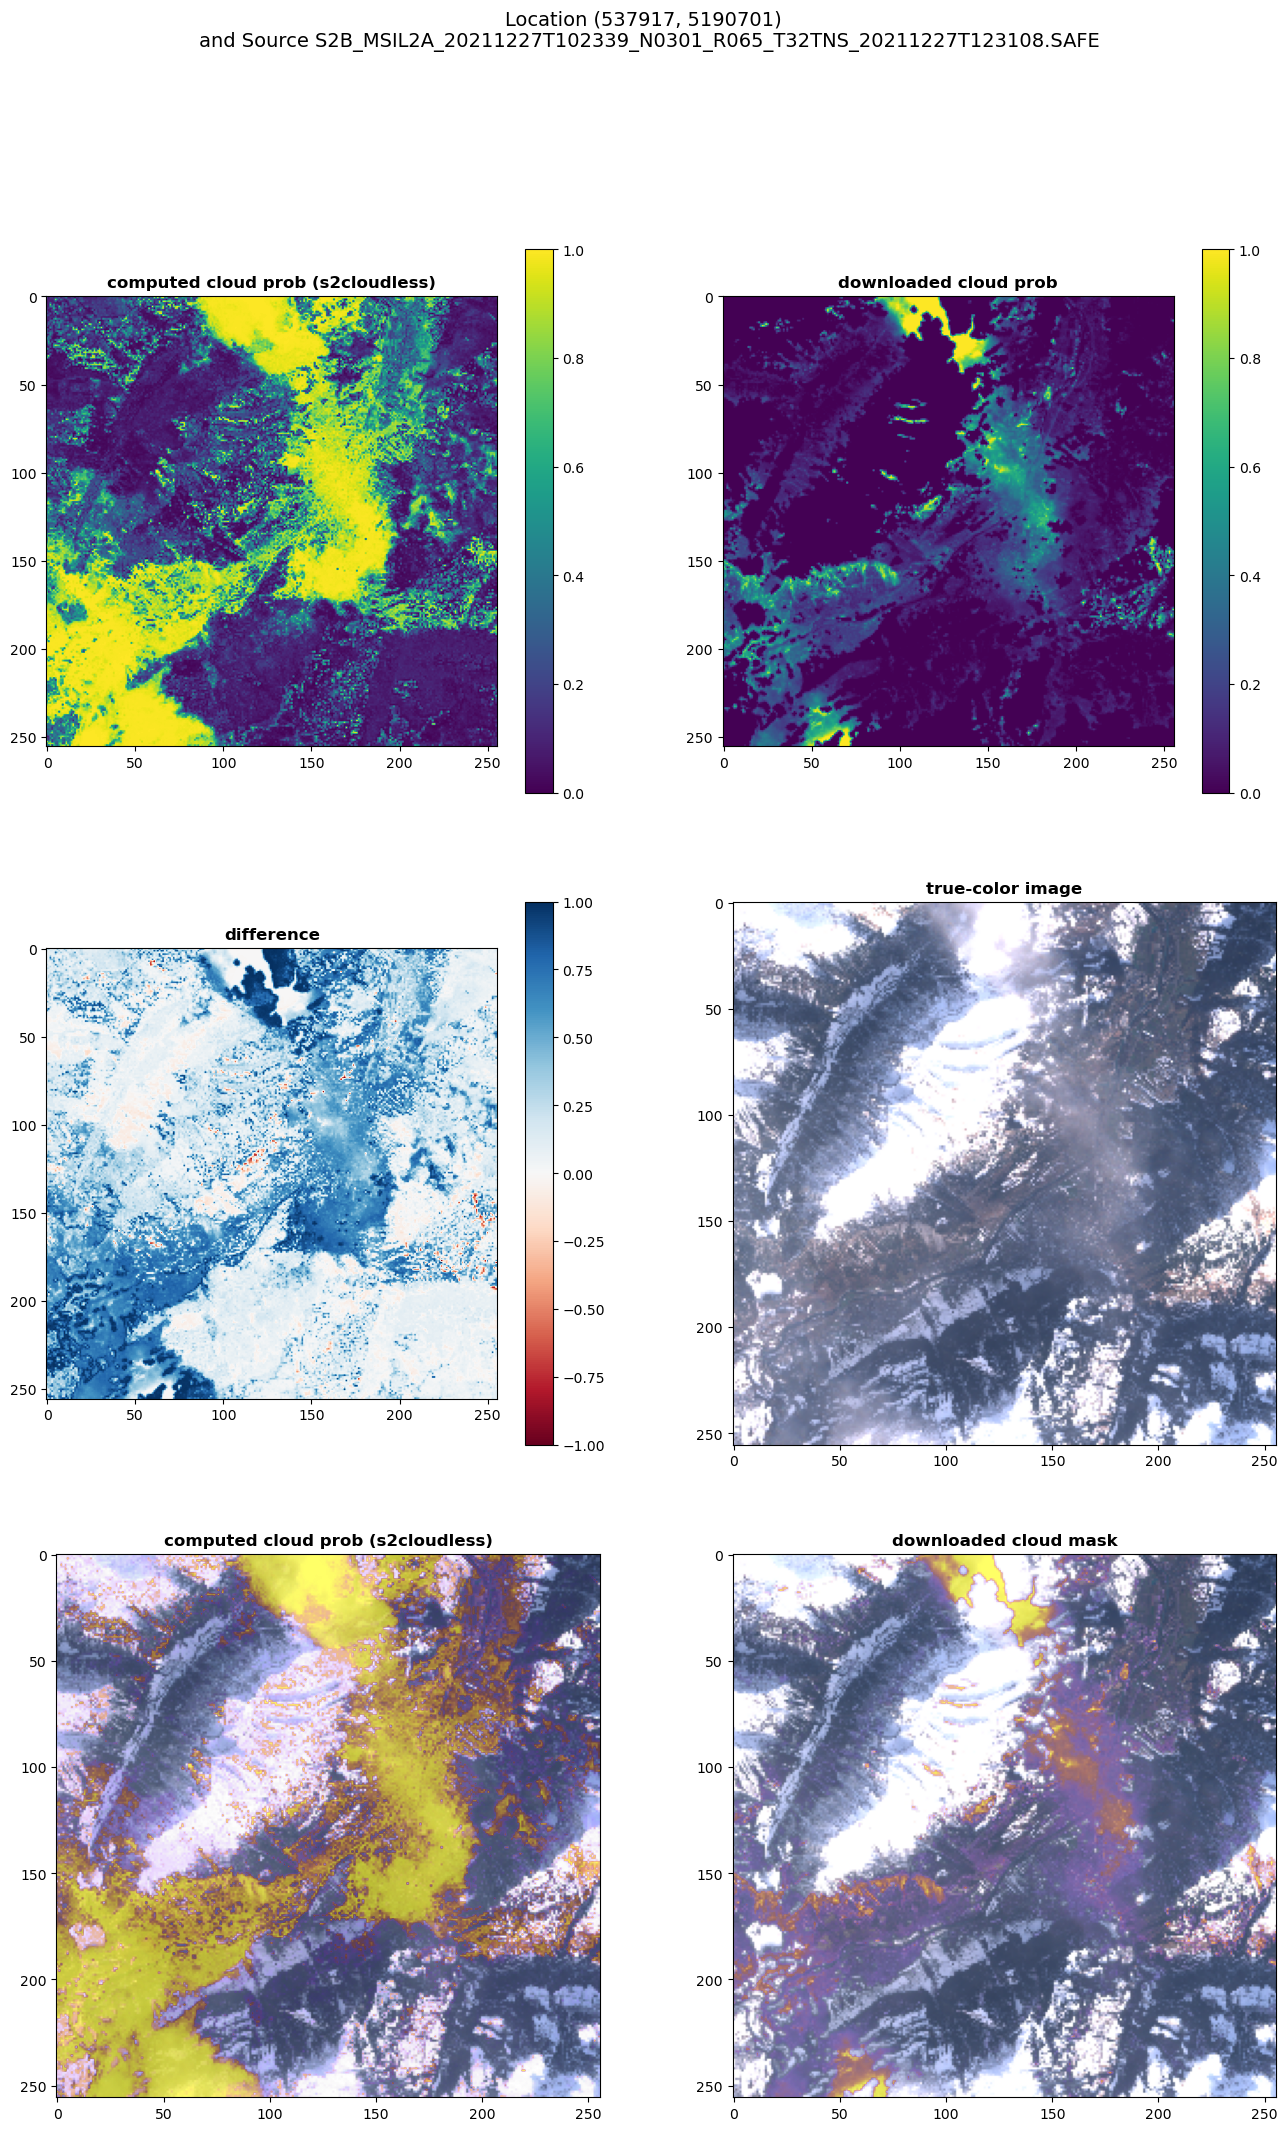

In [91]:
show_cloud_mask(cloud_probs, downloaded_cloud_probs, windowed_TCI_band)
# show_all_bands(bands_windowed_resized, bands)